In [147]:
import pandas as pd
import os
import numpy as np
import sqlite3 as sq3
import pandas.io.sql as pds
import requests
import certifi
import pylab
import matplotlib.pyplot as plt

In [148]:
filepath_Crypto = "ETH_BTC.csv"
Crypto_data = pd.read_csv(filepath_Crypto)
Crypto_data

,Time,BTC / USD Denominated Closing Price,BTC / Realized Market Cap (USD),"BTC / ROI, 1 Year",ETH / USD Denominated Closing Price,ETH / Realized Market Cap (USD),"ETH / ROI, 1 Year"
0,2/4/2022,41079.90609,4.554660e+11,10.640420,2969.932183,2.321230e+11,84.651626
1,2/5/2022,41508.58169,4.556760e+11,9.102722,3017.609916,2.330650e+11,75.393646
2,2/6/2022,42358.22517,4.558600e+11,7.667427,3049.372191,2.321960e+11,81.110535
3,2/7/2022,43888.98012,4.566060e+11,12.527155,3145.373676,2.344440e+11,94.634322
4,2/8/2022,44167.44479,4.570370e+11,-4.237657,3126.634352,2.342950e+11,79.326299
5,2/9/2022,44405.07320,4.573790e+11,-4.604025,3241.723961,2.365870e+11,83.062112
6,2/10/2022,43614.34270,4.575680e+11,-3.247219,3080.565482,2.340230e+11,76.212371
7,2/11/2022,42357.32174,4.576830e+11,-11.558135,2924.080468,2.314210e+11,63.760538
8,2/12/2022,42173.45940,4.578880e+11,-11.260865,2910.836175,2.310460e+11,57.644645
9,2/13/2022,42195.59475,4.579540e+11,-10.618886,2880.696526,2.304810e+11,58.331112


In [149]:
Crypto_data.columns

Index(['Time', 'BTC / USD Denominated Closing Price',
       'BTC / Realized Market Cap (USD)', 'BTC / ROI, 1 Year',
       'ETH / USD Denominated Closing Price',
       'ETH / Realized Market Cap (USD)', 'ETH / ROI, 1 Year'],
      dtype='object')

In [150]:
print(Crypto_data.shape[0])

print(Crypto_data.dtypes)
Crypto_data = Crypto_data.rename(columns={'BTC / USD Denominated Closing Price': 'BTC'})
Crypto_data = Crypto_data.rename(columns={ 'BTC / Realized Market Cap (USD)': 'BTC_Market_Cap'})
Crypto_data = Crypto_data.rename(columns={ 'BTC / ROI, 1 Year': 'BTC ROI'})
Crypto_data = Crypto_data.rename(columns={ 'ETH / USD Denominated Closing Price': 'ETH'})
Crypto_data = Crypto_data.rename(columns={ 'ETH / Realized Market Cap (USD)': 'ETH_Market_Cap'})
Crypto_data = Crypto_data.rename(columns={ 'ETH / ROI, 1 Year': 'ETH ROI'})

print(Crypto_data.columns.tolist())






29
Time                                    object
BTC / USD Denominated Closing Price    float64
BTC / Realized Market Cap (USD)        float64
BTC / ROI, 1 Year                      float64
ETH / USD Denominated Closing Price    float64
ETH / Realized Market Cap (USD)        float64
ETH / ROI, 1 Year                      float64
dtype: object
['Time', 'BTC', 'BTC_Market_Cap', 'BTC ROI', 'ETH', 'ETH_Market_Cap', 'ETH ROI']


In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

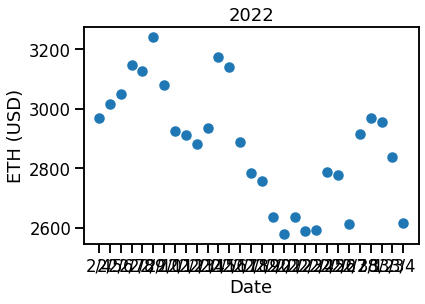

In [152]:

Crypto_data['Time'] = data.Time.str.replace('/2022', '')
ax = plt.axes()




ax.scatter(Crypto_data.Time, Crypto_data.ETH)


ax.set(xlabel='Date',
       ylabel='ETH (USD)',
       title='2022'); 

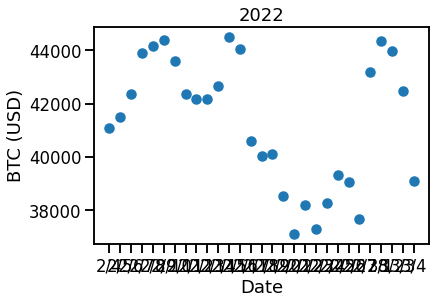

In [153]:
Crypto_data['Time'] = data.Time.str.replace('/2022', '')
ax = plt.axes()

ax.scatter(Crypto_data.Time, Crypto_data.BTC)


ax.set(xlabel='Date',
       ylabel='BTC (USD)',
       title='2022');


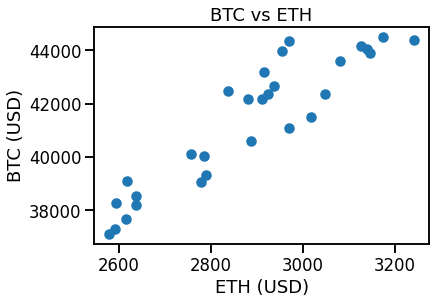

In [154]:
ax = plt.axes()

ax.scatter(Crypto_data.ETH, Crypto_data.BTC)


ax.set(xlabel='ETH (USD)',
       ylabel='BTC (USD)',
       title='BTC vs ETH');

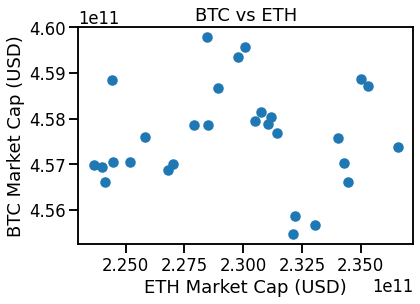

In [158]:
ax = plt.axes()

ax.scatter(Crypto_data.ETH_Market_Cap, Crypto_data.BTC_Market_Cap)

ax.set(xlabel='ETH Market Cap (USD)',
       ylabel='BTC Market Cap (USD)',
       title='BTC vs ETH');

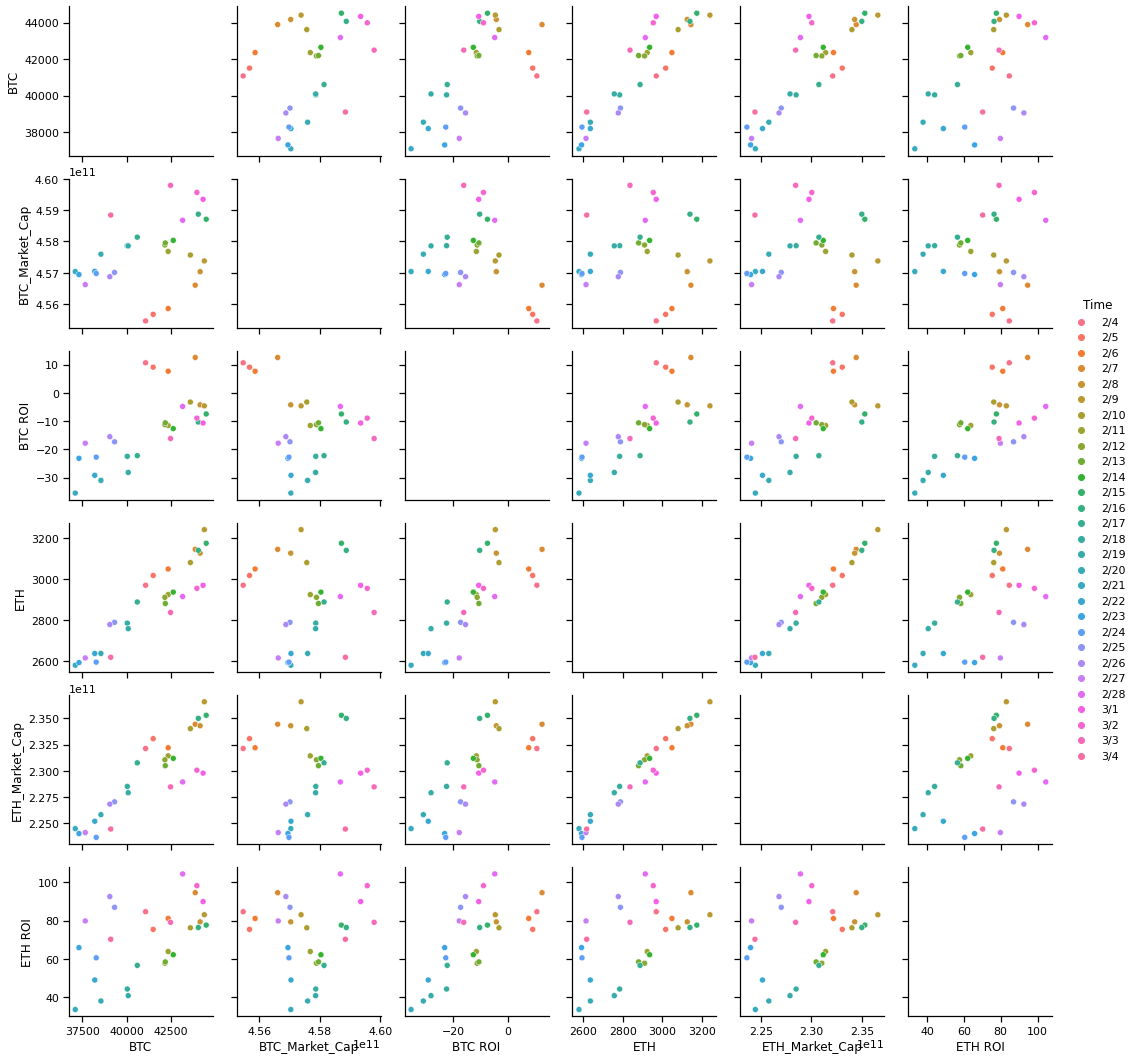

In [159]:
sns.set_context('notebook')
sns.pairplot(Crypto_data, hue='Time');